In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 50s 0us/step


In [5]:
x_train.shape

(50000, 32, 32, 3)

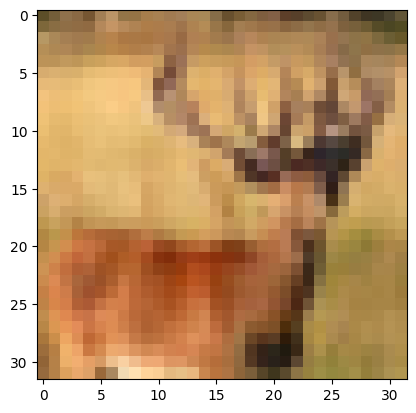

In [12]:
plt.imshow(x_train[543])

In [13]:
x_train = x_train/255
x_test = x_test/255

In [14]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_cat_train = to_categorical(y_train, 10)

In [17]:
y_cat_test = to_categorical(y_test, num_classes=10)

In [16]:
# batch_size, width, height, color_channels
x_train = x_train.reshape(60000, 28, 28, 1)

In [18]:
x_test = x_test.reshape(10000, 28, 28, 1)

Creating and Training the Model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [19]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

# output layer
model.add(Dense(10, activation='softmax'))

# keras.io/metrics

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\aashi\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 29, 29, 32)     │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       205,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,610 (881.29 KB)

 Trainable params: 225,610 (881.29 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [22]:
model.fit(x_train, y_cat_train, epochs=15, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - accuracy: 0.3727 - loss: 1.7177 - val_accuracy: 0.5502 - val_loss: 1.2562
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.5660 - loss: 1.2236 - val_accuracy: 0.6013 - val_loss: 1.1443
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.6284 - loss: 1.0559 - val_accuracy: 0.6326 - val_loss: 1.0443
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.6781 - loss: 0.9156 - val_accuracy: 0.6500 - val_loss: 1.0065
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.7135 - loss: 0.8218 - val_accuracy: 0.6516 - val_loss: 0.9859
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.7438 - loss: 0.7363 - val_accuracy: 0.6759 - val_loss: 0.9613
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.7731 - loss: 0.6531 - val_accuracy: 0.6733 - val_loss: 0.9902
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.7952 -

In [23]:
metrics = pd.DataFrame(model.history.history)
metrics

,accuracy,loss,val_accuracy,val_loss
0,0.44916,1.519134,0.5502,1.256156
1,0.57900,1.189961,0.6013,1.144278
2,0.63740,1.035849,0.6326,1.044257
3,0.67902,0.916362,0.6500,1.006543
4,0.71176,0.824540,0.6516,0.985875
5,0.74062,0.742856,0.6759,0.961298
6,0.76516,0.670968,0.6733,0.990189
7,0.78750,0.604034,0.6675,1.046269


<Axes: >

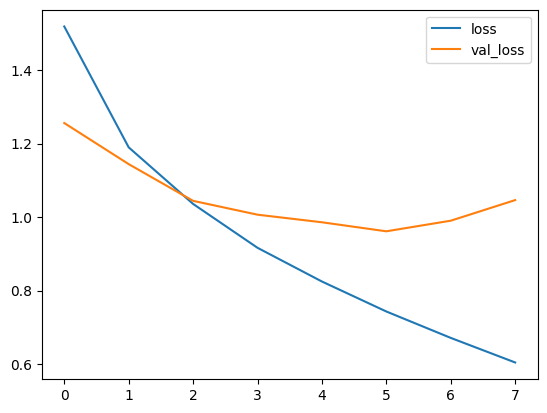

In [24]:
metrics[['loss', 'val_loss']].plot()

<Axes: >

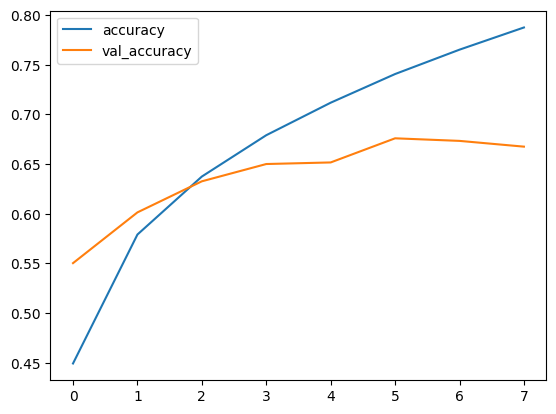

In [25]:
metrics[['accuracy', 'val_accuracy']].plot()

In [26]:
model.evaluate(x_test, y_cat_test, verbose=0)

[1.046269416809082, 0.6675000190734863]

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = (model.predict(x_test) > 0.5).astype("int32")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [28]:
print(classification_report(y_cat_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71      1000
           1       0.78      0.77      0.77      1000
           2       0.61      0.53      0.57      1000
           3       0.60      0.39      0.47      1000
           4       0.69      0.53      0.60      1000
           5       0.65      0.51      0.57      1000
           6       0.70      0.79      0.74      1000
           7       0.88      0.57      0.69      1000
           8       0.76      0.78      0.77      1000
           9       0.87      0.58      0.70      1000

   micro avg       0.73      0.61      0.67     10000
   macro avg       0.73      0.61      0.66     10000
weighted avg       0.73      0.61      0.66     10000
 samples avg       0.61      0.61      0.61     10000



C:\Users\aashi\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [29]:
print(confusion_matrix(y_cat_test, predictions))

ValueError: multilabel-indicator is not supported